###  ⚙️ Dependencies

In [28]:
#!pip install librosa
#!pip install noisereduce
#!pip install soundfile

### 🧐 Import libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from IPython.display import Audio
import librosa as lr
import librosa.display
import os
import io
import sys
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise

### 𝌨 Loading AVICAR Dataset

In [30]:
# set directory for loading Avicar folder audio files
data_dir='/Users/Farida/Downloads/avicar_somedigits'
audio_files=glob(data_dir + '/*.wav')
len(audio_files)

10023

### 𝄞 Load the 1st audio file

In [31]:
data, rate = sf.read(audio_files[0])
#np.set_printoptions(threshold=sys.maxsize)  # Use this code to view full array items
#print(data)
np.shape(data)  # Array size is 15153

(15153,)

### 📻 Sampling rate

In [32]:
print(rate) # sampling rate is 16Khz

16000


### 🎶 Listen to the audio

In [33]:
Audio(data=audio_files[0], autoplay=True)

In [18]:
sf.write('Raw_audio_files_0.wav',data,rate)

### ↔️ Find duration of the Audio file

In [34]:
file_name=audio_files[0]
dur_avi=lr.get_duration(y=data, sr=rate)
print(dur_avi)  # Duration is .9470635 seconds

0.9470625


### 〽️ Plot Amplitude audio over Time

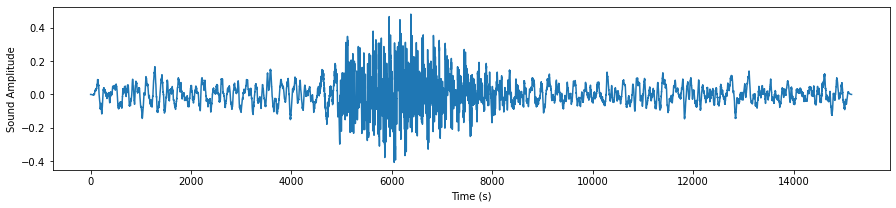

In [35]:
fig, ax = plt.subplots(figsize=(15,3))
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.plot(data)

#### Inference:

- The number of audio files = 10023 files 

- Sampling rate = 16000 hz

- AVICAR dataset is created in a car environment. 

- The first audio file in the AVICAR dataset has a male voice speaking the word **"Done"** in a moving car environment.

- The background noise of the moving car is captured along with the human voice during audio recording. This background noise is a stationary noise and it should be removed.

- Duration of the first audio file = 0.9470625 seconds

- The waveplot shows the distorted amplitude wave
    - There are wavy spikes throughout the length of the audio.
    - These wavy spikes implies background noise of the moving car.


# 🚘 Stationary Noise Removal using Noise Reduce API

### Synthetic Noise creation

In [36]:
noise_len = 1 # seconds
noise = band_limited_noise(min_freq=10000, max_freq = 20000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data+noise


In [37]:
type(audio_clip_band_limited)

numpy.ndarray

###  🔊  Play Audio with the added synthetic noise

In [38]:
Audio(data=audio_clip_band_limited, rate=rate, autoplay=True)

### 〽️ Plot Graph for the noisy Audio 

In [ ]:
fig, ax = plt.subplots(figsize=(15,3))
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.plot(audio_clip_band_limited)

### 🔇 Removing Noise 

In [40]:
    reduced_noise = nr.reduce_noise(y = audio_clip_band_limited,n_std_thresh_stationary=1.5,sr=rate,stationary=True)


### 〰 Plot Graph for the cleaned Audio

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.plot(reduced_noise, color ="green")

The straight line implies silence in audio. \
The waveform represents human voice utterring the word **"Done"**

### 🔈 Listen to Clean Audio 

In [42]:
Audio(data=reduced_noise, rate=rate, autoplay=True)

### 💾 Save the Cleaned Audio 

In [43]:
sf.write('Cleaned_AF1_35D_D0_C1_M3.wav',reduced_noise,rate)

In [44]:
Audio(data='Cleaned_AF1_35D_D0_C1_M3.wav',autoplay=True)

# 📚Removing background noise for Deep Learning Datasets

### Function for synthetic noise generation

In [45]:
#Function for adding Synthetic noise 
def S_noise_reducer(data,length,rate):
    noise_len = int(length) # seconds
    noise = band_limited_noise(min_freq=10000, max_freq = 20000, samples=len(data), samplerate=rate)*10
    noise_clip = noise[:rate*noise_len]
    audio_clip_band_limited = data+noise
    return(audio_clip_band_limited)

### Cleaning the whole dataset (car noise + synthetic noise)

In [ ]:
audio_dur=[]
for file in range(0, len(audio_files),1):
    #print(file)
    file_name=os.path.basename(audio_files[file])
    print(file,file_name)
    
    #Read the first audio file
    audio, sfreq=lr.load(audio_files[file])
    time=np.arange(0,len(audio))/sfreq
    
    #find the audio duration
    duration_avi=lr.get_duration(y=audio, sr=sfreq)
    #print('Audio Duration or length:',duration_avi)
    audio_dur.append(duration_avi)
    
    #Plot audio over time( Orginal Audio)
    print('Original_',file_name)
    fig, ax=plt.subplots(figsize=(20,3))
    ax.plot(time,audio)
    ax.set(xlabel='Time(s)',ylabel='Sound Amplitude')
    plt.show()
    
    
    #Stationary noise removal
    #Step1: Add noise
    audio_clip_band_limited=S_noise_reducer(audio,duration_avi,sfreq) 
    reduced_noise = nr.reduce_noise(y = audio_clip_band_limited,n_std_thresh_stationary=1.5,sr=rate,stationary=True)
    
    #Plot Cleaned waveform
    print('Cleaned_',file_name)
    fig, ax=plt.subplots(figsize=(20,3))
    ax.plot(time,reduced_noise,color="green")
    plt.show()
    
    print('*****************************************************************************')
    
    #Save the Cleaned file
    sf.write('Cleaned_avicar_somedigits/Cleaned_'+file_name, reduced_noise, sfreq)
 
    
    

### Limitations

1. This algorithm works for max audio length of 1 second for the entire dataset.

2. If the given audio length is > 1 sec the algorithm trims the audio to 1 sec.

### Future Work

This algorithm can be improvised using Speech-to-text API (Google API) to convert the clean audio file to text. \
This text can be fed into the Voice Assistant for response generation.

### References

 1. **AVICAR Dataset**
     - AVICAR Dataset - Stationary noise dataset (car driving noise + driver/passenger noise)
     - Link : http://www.isle.illinois.edu/sst/AVICAR/

     
     
 2. **Noisereduce API**
     - Link : https://timsainburg.com/noise-reduction-python.html

### License Citation